In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [0]:
# load data
import pandas as pd
dataset = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
dataset.shape

(41188, 21)

In [4]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
print(dataset.describe())

               age      duration  ...     euribor3m   nr.employed
count  41188.00000  41188.000000  ...  41188.000000  41188.000000
mean      40.02406    258.285010  ...      3.621291   5167.035911
std       10.42125    259.279249  ...      1.734447     72.251528
min       17.00000      0.000000  ...      0.634000   4963.600000
25%       32.00000    102.000000  ...      1.344000   5099.100000
50%       38.00000    180.000000  ...      4.857000   5191.000000
75%       47.00000    319.000000  ...      4.961000   5228.100000
max       98.00000   4918.000000  ...      5.045000   5228.100000

[8 rows x 10 columns]


In [10]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [0]:
X_train = dataset.iloc[:,0:20]
y_train = dataset.iloc[:,20]

In [7]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [8]:
y_train.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [9]:
import collections
collections.Counter(y_train)

Counter({'no': 36548, 'yes': 4640})

#we can see from the above that it is highly imbalanced

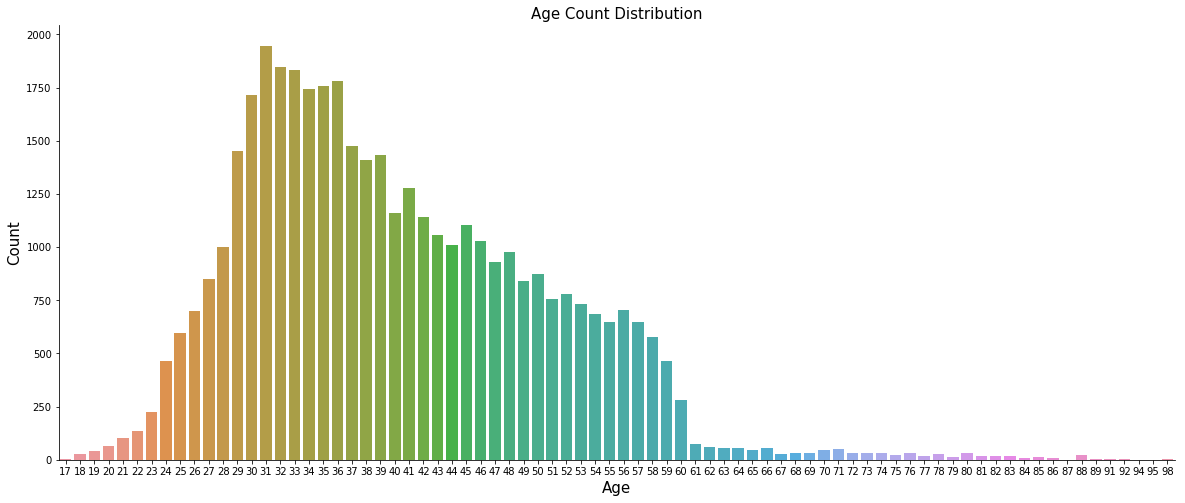

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = dataset)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

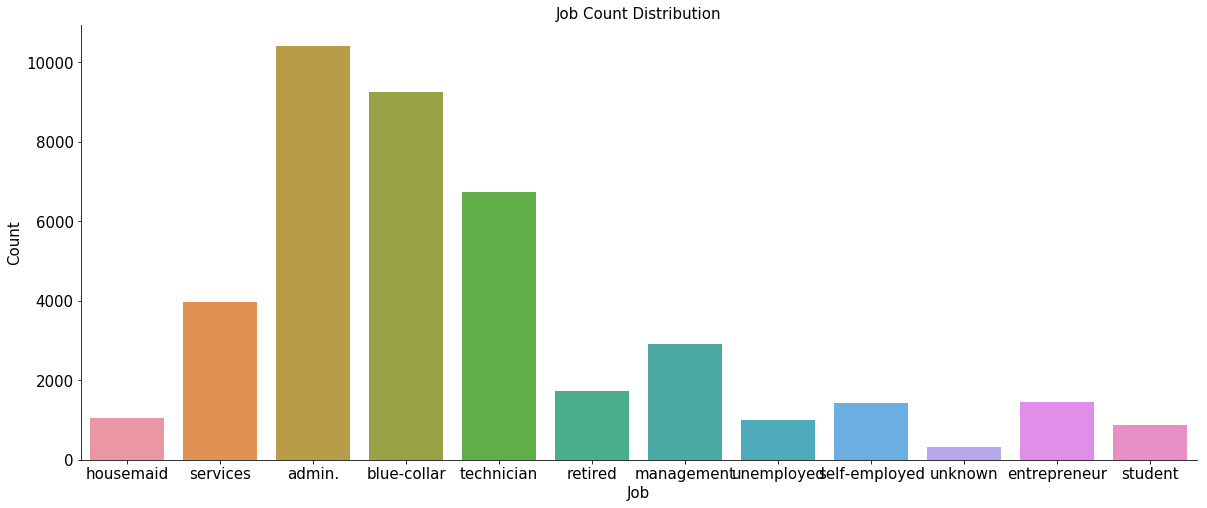

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = dataset)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

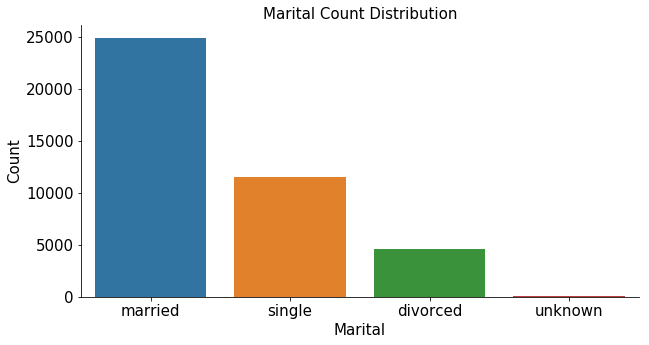

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = dataset)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

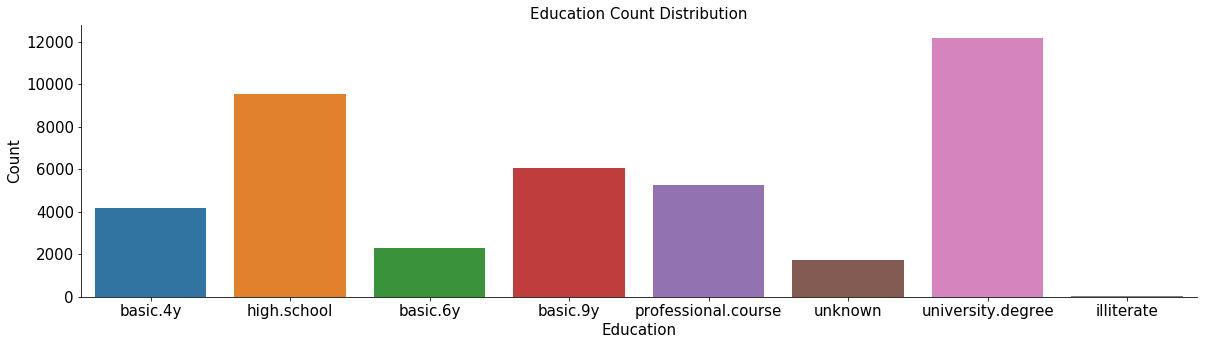

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = dataset)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

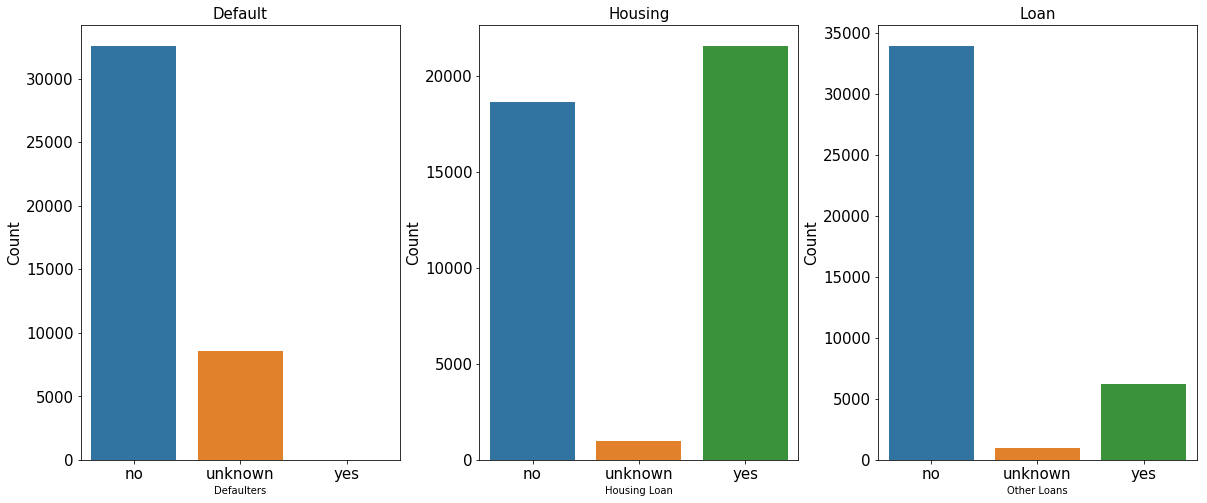

In [20]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = dataset, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('Defaulters')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = dataset, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('Housing Loan')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = dataset, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('Other Loans')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [21]:
print('Default:\n No credit in default:'     , dataset[dataset['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', dataset[dataset['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , dataset[dataset['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [22]:
print('Housing:\n No to personal loan:'     , dataset[dataset['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', dataset[dataset['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , dataset[dataset['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


# this shows that most of our potential customer base is with blue collared and management class who are mostly married and possibly have a housing loan with the bank mostly aged from 25 -60

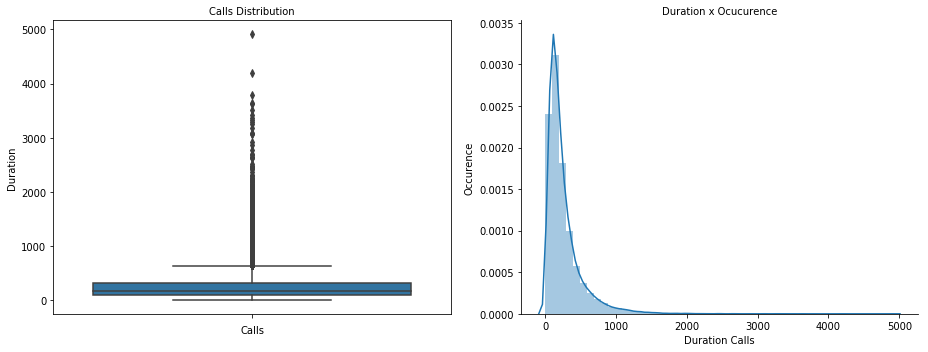

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = dataset, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(dataset['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

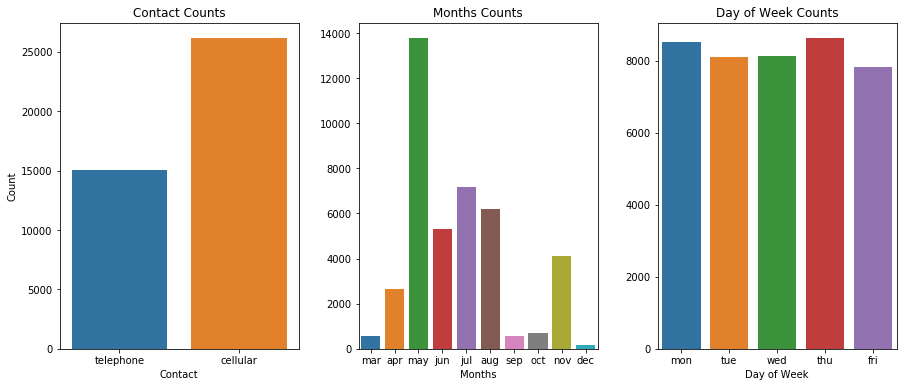

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(dataset['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(dataset['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(dataset['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)

#most ppl were contacted in May. The data in jan n feb are missing and mostly used means of contact is cellular contact

# these are normal patterns expected in any data. There is nothing special in this data to transform so far

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataset['job']      = labelencoder_X.fit_transform(dataset['job']) 
dataset['marital']  = labelencoder_X.fit_transform(dataset['marital']) 
dataset['education']= labelencoder_X.fit_transform(dataset['education']) 
dataset['default']  = labelencoder_X.fit_transform(dataset['default']) 
dataset['housing']  = labelencoder_X.fit_transform(dataset['housing']) 
dataset['loan']     = labelencoder_X.fit_transform(dataset['loan']) 

#feature engineer the categorical columns to create label encoders using one hot encoding

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataset['contact']     = labelencoder_X.fit_transform(dataset['contact']) 
dataset['month']       = labelencoder_X.fit_transform(dataset['month']) 
dataset['day_of_week'] = labelencoder_X.fit_transform(dataset['day_of_week'])
dataset['poutcome'] = labelencoder_X.fit_transform(dataset['poutcome'])
dataset['y'] = labelencoder_X.fit_transform(dataset['y'])

In [12]:
X = dataset.drop(['y','month'], 1)
Y = dataset['y']
X.shape


(41188, 19)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [14]:
# dataset.head()
# X = dataset.iloc[:,0:20]
# Y = dataset.iloc[:,20]
# X = np.array(dataset.drop(['y', 'pdays'], 1))
# Y = np.array(dataset['y'])
# X.shape
dataset.corr()['y']


age               0.030399
job               0.025122
marital           0.046203
education         0.057799
default          -0.099352
housing           0.011552
loan             -0.004909
contact          -0.144773
month            -0.006065
day_of_week       0.015967
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
poutcome          0.129789
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
y                 1.000000
Name: y, dtype: float64

In [15]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
19010,58,0,1,3,0,2,0,0,3,553,1,999,0,1,1.4,93.444,-36.1,4.968,5228.1
23466,53,9,1,5,1,2,2,0,4,276,2,999,0,1,1.4,93.444,-36.1,4.964,5228.1
27578,59,9,2,5,0,2,0,0,0,246,2,999,0,1,-0.1,93.200,-42.0,4.021,5195.8
32365,46,9,1,5,0,0,0,0,0,124,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
25394,39,10,1,2,1,2,0,0,3,467,1,999,0,1,-0.1,93.200,-42.0,4.153,5195.8


In [16]:
y_train.head()

19010    1
23466    0
27578    0
32365    0
25394    0
Name: y, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

import warnings
warnings.filterwarnings('ignore')




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')
print(confusion_matrix(y_test, logpred))
print(accuracy_score(y_test, logpred)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(LOGCV)


[[11785   305]
 [  912   591]]
91.04686235562421
0.9101279081372688


In [19]:
prob_test=logmodel.predict_proba(X_test)
prob_test
type(prob_test)


numpy.ndarray

In [0]:
prob_tests = pd.DataFrame({"prob_test":prob_test[:,0], "y_test": y_test, "y_pred":logpred}, columns=['prob_test', 'y_test', 'y_pred'])

In [21]:
prob_tests.shape

(13593, 3)

In [0]:
new_result = pd.concat([prob_tests, X_test],axis=1)
new_result.to_csv("new.csv")

In [23]:
new_result.shape
new_result.head()


,prob_test,y_test,y_pred,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3669,0.974009,0,0,32,7,1,3,0,0,2,1,0,270,1,999,0,1,1.1,93.994,-36.4,4.859,5191.0
20131,0.989825,0,0,57,9,2,3,0,2,0,0,1,72,2,999,0,1,1.4,93.444,-36.1,4.965,5228.1
2492,0.976182,0,0,33,4,2,6,0,2,2,1,3,160,3,999,0,1,1.1,93.994,-36.4,4.856,5191.0
14088,0.992819,0,0,29,1,1,2,0,2,0,0,1,104,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
34986,0.975690,0,0,27,1,1,2,0,0,2,0,0,12,5,999,0,1,-1.8,92.893,-46.2,1.250,5099.1


In [24]:
#prospect = new_result[new_result['prob_test'].str[:-1].astype(float) >= 0.5]
prospect = new_result[new_result['prob_test'].replace('%','', regex=True).astype(float) >= 0.995]
prospect.shape

(100, 22)

In [25]:
prospect.head()

,prob_test,y_test,y_pred,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
11372,0.995163,0,0,35,1,1,2,1,0,0,1,0,76,12,999,0,1,1.4,94.465,-41.8,4.959,5228.1
8431,0.995632,0,0,36,1,1,2,0,2,2,1,3,11,18,999,0,1,1.4,94.465,-41.8,4.864,5228.1
18360,0.995371,0,0,58,1,0,0,1,0,0,1,2,69,7,999,0,1,1.4,93.918,-42.7,4.968,5228.1
11900,0.996579,0,0,39,0,1,3,0,2,2,1,0,9,19,999,0,1,1.4,94.465,-41.8,4.959,5228.1
15435,0.996101,0,0,22,1,2,0,1,2,0,0,0,25,1,999,0,1,1.4,93.918,-42.7,4.957,5228.1


In [32]:
#Calculating “Average profit per customer” for reaching out to all the customers in training data
print("The number of customers to be reached out to are:",len(y_train))
print("Number of responders are:",y_train.value_counts()[1],"\n")
print("Cost associate for reaching out to customers: $",len(y_train)*10)
print("Revenue: $",y_train.value_counts()[1]*50)
print("Profit (revnue - cost):$",y_train.value_counts()[1]*50-len(y_train)*10)

#without any model,company would be at a loss

The number of customers to be reached out to are: 27595
Number of responders are: 3137 

Cost associate for reaching out to customers: $ 275950
Revenue: $ 156850
Profit (revnue - cost):$ -119100


# if we blindly reach out to all customers, we will be at loss

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
def cost_funciton(Y_Actual, Y_Predicted, cost_per_individual,
                  revenue_per_individual, low_threshold, high_threshold):
    cost_function_output = pd.DataFrame()
    for threshold in np.arange(low_threshold, high_threshold, 0.01):
        confusion_out = confusion_matrix(Y_Actual, np.where(Y_Predicted>threshold,1,0))
        target_populaion=round((confusion_out[1][1]+confusion_out[0][1])/len(Y_Actual),4)
        responders_in_target_populaiton=round(confusion_out[1][1]/(len(Y_Actual)),4)
        cost=(confusion_out[1][1]+confusion_out[0][1])*cost_per_individual
        revenue=confusion_out[1][1]*revenue_per_individual
        profit=revenue-cost
        ROI=round(profit/cost*100,0)
        cost_function_output=cost_function_output.append([[threshold, 
                                                           responders_in_target_populaiton*100, 
                                                           target_populaion*100, 
                                                           revenue, 
                                                           cost,  
                                                           profit, 
                                                           ROI]])
    return cost_function_output

In [42]:
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
Y_pred=logreg.predict_proba(X_train)[:,1] 
cost_function_output=cost_funciton(y_train, Y_pred , 10, 50, 0.5,0.995)
my_columns = ["Probability of event happening",  "% Responders_in_target_populaiton", 
              "% Target_populaion", "Revenue", "Cost",  "Profit","ROI"]
cost_function_output.columns = my_columns
cost_function_output

,Probability of event happening,% Responders_in_target_populaiton,% Target_populaion,Revenue,Cost,Profit,ROI
0,0.50,4.63,6.91,63900,19080,44820,235.0
0,0.51,4.53,6.72,62500,18550,43950,237.0
0,0.52,4.45,6.56,61450,18110,43340,239.0
0,0.53,4.37,6.41,60350,17680,42670,241.0
0,0.54,4.21,6.15,58050,16960,41090,242.0
0,0.55,4.12,5.97,56900,16480,40420,245.0
0,0.56,4.05,5.83,55850,16080,39770,247.0
0,0.57,3.94,5.64,54400,15550,38850,250.0
0,0.58,3.82,5.46,52650,15070,37580,249.0
0,0.59,3.73,5.30,51400,14630,36770,251.0


In [26]:
#class wise accuracy
target_names = ['class 0', 'class 1']
print(classification_report(y_test, logpred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.97      0.95     12090
     class 1       0.66      0.39      0.49      1503

    accuracy                           0.91     13593
   macro avg       0.79      0.68      0.72     13593
weighted avg       0.90      0.91      0.90     13593



In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500, criterion='entropy')#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict_prob(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(accuracy_score(y_test, rfcpred)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11664   426]
 [  736   767]]
91.45148238063709


In [44]:
# rfc = RandomForestClassifier(n_estimators = 500, criterion='entropy')#criterion = entopy,gini
# rfc.fit(X_train, y_train)
Y_pred=rfc.predict_proba(X_train)[:,1] 
cost_function_output=cost_funciton(y_train, Y_pred , 10, 50, 0.5,0.995)
my_columns = ["Probability of event happening",  "% Responders_in_target_populaiton", 
              "% Target_populaion", "Revenue", "Cost",  "Profit","ROI"]
cost_function_output.columns = my_columns
cost_function_output

,Probability of event happening,% Responders_in_target_populaiton,% Target_populaion,Revenue,Cost,Profit,ROI
0,0.50,11.37,11.37,156850,31370,125480,400.0
0,0.51,11.37,11.37,156850,31370,125480,400.0
0,0.52,11.37,11.37,156850,31370,125480,400.0
0,0.53,11.37,11.37,156850,31370,125480,400.0
0,0.54,11.37,11.37,156850,31370,125480,400.0
0,0.55,11.37,11.37,156850,31370,125480,400.0
0,0.56,11.37,11.37,156850,31370,125480,400.0
0,0.57,11.37,11.37,156850,31370,125480,400.0
0,0.58,11.36,11.36,156750,31350,125400,400.0
0,0.59,11.36,11.36,156750,31350,125400,400.0


In [207]:
#class wise accuracy
target_names = ['class 0', 'class 1']
print(classification_report(y_test, rfcpred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95     12090
     class 1       0.65      0.52      0.58      1503

    accuracy                           0.92     13593
   macro avg       0.79      0.74      0.76     13593
weighted avg       0.91      0.92      0.91     13593



In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(accuracy_score(y_test, xgbprd)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[11690   400]
 [  754   749]]
91.51033620245714


In [208]:
#class wise accuracy
target_names = ['class 0', 'class 1']
print(classification_report(y_test, xgbprd, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.97      0.95     12090
     class 1       0.65      0.50      0.56      1503

    accuracy                           0.92     13593
   macro avg       0.80      0.73      0.76     13593
weighted avg       0.91      0.92      0.91     13593



In [46]:
Y_pred=xgb.predict_proba(X_train)[:,1] 
cost_function_output=cost_funciton(y_train, Y_pred , 10, 50, 0.5,0.995)
my_columns = ["Probability of event happening",  "% Responders_in_target_populaiton", 
              "% Target_populaion", "Revenue", "Cost",  "Profit","ROI"]
cost_function_output.columns = my_columns
cost_function_output

,Probability of event happening,% Responders_in_target_populaiton,% Target_populaion,Revenue,Cost,Profit,ROI
0,0.50,6.07,8.65,83750,23880,59870,251.0
0,0.51,5.87,8.33,81050,22990,58060,253.0
0,0.52,5.70,7.98,78650,22020,56630,257.0
0,0.53,5.52,7.64,76150,21090,55060,261.0
0,0.54,5.31,7.30,73300,20140,53160,264.0
0,0.55,5.01,6.79,69150,18750,50400,269.0
0,0.56,4.79,6.40,66100,17650,48450,275.0
0,0.57,4.55,6.02,62800,16600,46200,278.0
0,0.58,4.36,5.69,60200,15690,44510,284.0
0,0.59,4.12,5.30,56850,14630,42220,289.0


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(accuracy_score(y_test, gbkpred)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11652   438]
 [  703   800]]
91.60597366291474


In [210]:
#class wise accuracy
target_names = ['class 0', 'class 1']
print(classification_report(y_test, gbkpred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95     12090
     class 1       0.65      0.53      0.58      1503

    accuracy                           0.92     13593
   macro avg       0.79      0.75      0.77     13593
weighted avg       0.91      0.92      0.91     13593



In [48]:
Y_pred=gbk.predict_proba(X_train)[:,1] 
cost_function_output=cost_funciton(y_train, Y_pred , 10, 50, 0.5,0.995)
my_columns = ["Probability of event happening",  "% Responders_in_target_populaiton", 
              "% Target_populaion", "Revenue", "Cost",  "Profit","ROI"]
cost_function_output.columns = my_columns
cost_function_output

,Probability of event happening,% Responders_in_target_populaiton,% Target_populaion,Revenue,Cost,Profit,ROI
0,0.50,6.36,9.12,87700,25180,62520,248.0
0,0.51,6.22,8.85,85800,24430,61370,251.0
0,0.52,6.06,8.58,83550,23670,59880,253.0
0,0.53,5.91,8.29,81550,22870,58680,257.0
0,0.54,5.74,7.98,79150,22010,57140,260.0
0,0.55,5.58,7.67,77000,21160,55840,264.0
0,0.56,5.42,7.37,74800,20350,54450,268.0
0,0.57,5.23,7.03,72100,19390,52710,272.0
0,0.58,5.01,6.64,69100,18310,50790,277.0
0,0.59,4.77,6.21,65850,17140,48710,284.0


In [211]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier','Logistic Model', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, LOGCV, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Gradient Boosting,0.916615
2,XGBoost,0.916325
0,Random Forest Classifier,0.915817
1,Logistic Model,0.910128


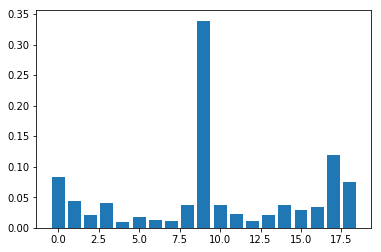

In [212]:
from matplotlib import pyplot
# plot
pyplot.bar(range(len(gbk.feature_importances_)), rfc.feature_importances_)
pyplot.show()

In [0]:
#shows that duration is more important than anything; i.e. how long customer spoke

#duration may not be available all the time